In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importing data
data = pd.read_csv("house_price.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Preprocessing Data

In [3]:
def get_na():
    # For getting columns having NA > 0
    for col in range(len(data.columns)):
        if data[data.columns[col]].isna().sum() > 0:
            print(data.columns[col] , data[data.columns[col]].isna().sum(), end = "\n")
get_na()

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [4]:
print("Before Dropping Columns Dimensions:",data.shape)

Before Dropping Columns Dimensions: (1460, 81)


In [4]:
# Removing columns having no significane value for analysis purpose
dump_vars = ['Id', 'PoolQC', 'Fence' , 'MiscFeature', 'Alley']
data.drop(dump_vars, inplace = True, axis = 1)
print("After Dropping Columns Dimensions:",data.shape)

After Dropping Columns Dimensions: (1460, 76)


In [5]:
get_na()

LotFrontage 259
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81


In [6]:
# Treatment for BsmtFinType2
data.BsmtFinType2.value_counts()
data.BsmtFinType2.fillna("None",inplace=True)
data.BsmtFinType2.isna().sum()

0

In [7]:
# Treatment for BsmtFinType1
data.BsmtFinType1.value_counts()
data.BsmtFinType1.fillna("None",inplace=True)
data.BsmtFinType1.isna().sum()

0

In [8]:
# Treatment for MasVnrType
data.MasVnrType.value_counts()
data.MasVnrType.fillna("None",inplace=True)
data.MasVnrType.isna().sum()

0

In [9]:
# Treatment for Electrical
data.Electrical.value_counts()
data.Electrical.fillna("SBrkr",inplace=True)
data.Electrical.isna().sum()

0

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
0


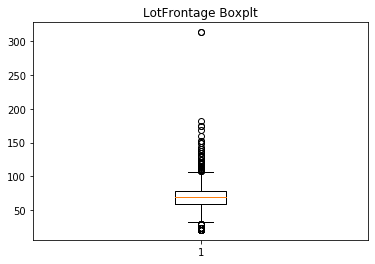

In [10]:
# Treatment for LotFrontage
print(data.LotFrontage.describe())
data.LotFrontage.fillna(70.104795,inplace=True)
print(data.LotFrontage.isna().sum())
plt.title("LotFrontage Boxplt")
plt.boxplot(data.LotFrontage, notch = None, vert = None)
plt.show()

count    1460.000000
mean       70.059686
std        22.024033
min        21.000000
25%        60.000000
50%        70.104795
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64
0


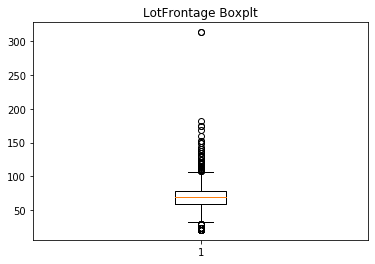

In [11]:
# Treatment for GarageYrBlt
print(data.LotFrontage.describe())
data.GarageYrBlt.fillna(data.GarageYrBlt.mean,inplace=True)
print(data.LotFrontage.isna().sum())
plt.title("LotFrontage Boxplt")
plt.boxplot(data.LotFrontage, notch = None, vert = None)
plt.show()

In [12]:
# Treatment for BsmtCond
data.BsmtCond.value_counts()
data.BsmtCond.fillna("None",inplace=True)
data.BsmtCond.isna().sum()

0

In [13]:
# Treatment for BsmtExposure
data.BsmtExposure.value_counts()
data.BsmtExposure.fillna("No",inplace=True)
data.BsmtExposure.isna().sum()

0

In [14]:
# Treatment for FireplaceQu
data.FireplaceQu.value_counts()
data.FireplaceQu.fillna("No",inplace=True)
data.FireplaceQu.isna().sum()

0

In [15]:
# Treatment for GarageCond
data.GarageCond.value_counts()
data.GarageCond.fillna("No",inplace=True)
data.GarageCond.isna().sum()

0

In [16]:
# Treatment for GarageType
data.GarageType.value_counts()
data.GarageType.fillna("No",inplace=True)
data.GarageType.isna().sum()

0

In [17]:
# Treatment for GarageFinish
data.GarageFinish.value_counts()
data.GarageFinish.fillna("No",inplace=True)
data.GarageFinish.isna().sum()

0

In [18]:
# Treatment for GarageQual
data.GarageQual.value_counts()
data.GarageQual.fillna("No",inplace=True)
data.GarageQual.isna().sum()

0

In [19]:
# Treatment for MasVnrArea
print(data.MasVnrArea.describe())
data.MasVnrArea.fillna(data.GarageYrBlt.mean,inplace=True)
data.MasVnrArea.isna().sum()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


0

In [20]:
# Treatment for BsmtQual
data.BsmtQual.value_counts()
data.BsmtQual.fillna("None",inplace=True)
data.BsmtQual.isna().sum()

0

In [21]:
get_na()
## No NA's available in dataset

## Data Preparation for PCA

In [23]:
# Saperation of Numerical and categorical data
num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_col = data.select_dtypes(include = num_types)
num_col.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [24]:
num_col.drop('SalePrice', inplace=True, axis = 1)

C:\Users\HP\Anaconda\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [25]:
len(num_col.columns)

34

# Scaling Numerical Variables

In [26]:
from sklearn.preprocessing import StandardScaler as sc

In [27]:
# Standardise Numeric data
stanard_pca_data = sc().fit_transform(num_col)
stanard_pca_data

array([[ 0.07337496, -0.22981349, -0.20714171, ..., -0.08768781,
        -1.5991111 ,  0.13877749],
       [-0.87256276,  0.45149405, -0.09188637, ..., -0.08768781,
        -0.48911005, -0.61443862],
       [ 0.07337496, -0.09355198,  0.07347998, ..., -0.08768781,
         0.99089135,  0.13877749],
       ...,
       [ 0.30985939, -0.18439299, -0.14781027, ...,  4.95311151,
        -0.48911005,  1.64520971],
       [-0.87256276, -0.09355198, -0.08016039, ..., -0.08768781,
        -0.8591104 ,  1.64520971],
       [-0.87256276,  0.22439154, -0.05811155, ..., -0.08768781,
        -0.1191097 ,  0.13877749]])

In [28]:
# Calculating covarience_matrix
cov_mat = np.cov(stanard_pca_data.T)  ## Pass transpose of  matrix as it require data row vise
cov_mat

array([[ 1.0006854 , -0.35731503, -0.13987689, ..., -0.00768856,
        -0.01359395, -0.02142171],
       [-0.35731503,  1.0006854 ,  0.30712087, ...,  0.00124348,
         0.01014937,  0.0067931 ],
       [-0.13987689,  0.30712087,  1.0006854 , ...,  0.03809378,
         0.00120581, -0.01427118],
       ...,
       [-0.00768856,  0.00124348,  0.03809378, ...,  1.0006854 ,
        -0.006499  ,  0.00490963],
       [-0.01359395,  0.01014937,  0.00120581, ..., -0.006499  ,
         1.0006854 , -0.14582129],
       [-0.02142171,  0.0067931 , -0.01427118, ...,  0.00490963,
        -0.14582129,  1.0006854 ]])

In [29]:
# Find Eigen values, Eigen vectors 
eig_values, eig_vectors = np.linalg.eig(cov_mat)

In [30]:
# Eigen values and vectors pair vise
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]
eig_pairs

[(6.5838478744671995,
  array([ 0.02358697, -0.17858967, -0.12243121, -0.30926242,  0.07679495,
         -0.2251404 , -0.20466316, -0.14463651,  0.00697161, -0.12264387,
         -0.27133487, -0.27451409, -0.14782911,  0.00629385, -0.32417835,
         -0.07606863,  0.01206553, -0.27190243, -0.13037306, -0.13337658,
          0.01174463, -0.26468618, -0.20146977, -0.29046985, -0.2861345 ,
         -0.13810784, -0.15825394,  0.06697171, -0.01720908, -0.03748528,
         -0.05924716,  0.00945454, -0.02541983,  0.01538618])),
 (3.1652859358629564,
  array([ 0.19624262, -0.05541118, -0.07272226, -0.01957071,  0.04365705,
         -0.16108258, -0.06006437, -0.32390396, -0.09115219,  0.12056167,
         -0.24883301, -0.20212518,  0.43145543,  0.11103447,  0.21999353,
         -0.31122115, -0.00437922,  0.15394166,  0.23382719,  0.33682925,
          0.16839666,  0.29847844, -0.0256453 , -0.07080687, -0.11035833,
         -0.07675554,  0.03316515,  0.09669011, -0.031967  , -0.00212757,
    

In [31]:
# Ordering Eigen values and vectors descending manner
total = sum(eig_values)
var_exp = [(i / total)*100 for i in sorted(eig_values, reverse=True)]
print("Variance explained:", var_exp)

Variance explained: [19.350995263593155, 9.303288034697932, 6.627712799256194, 5.937503103626797, 4.326720949922115, 3.4969275128971953, 3.3834743294997014, 3.2584085782237433, 3.2563425150277734, 3.1426389313727823, 2.984325679665109, 2.9634524355528526, 2.8947018711445076, 2.7748643394950028, 2.6810985534259113, 2.622915829056967, 2.4803655385755365, 2.3570024502882063, 2.277662589755914, 2.102652463218536, 1.8514727481477522, 1.7294419203174336, 1.588884920994442, 1.2813276246326613, 1.1582597989300691, 0.8920130310950217, 0.827136989169758, 0.7534732323927424, 0.5707542493592688, 0.446020686176351, 0.3851468794900969, 0.2930141509984797, 2.7105617141807836e-16, -3.9109934760176814e-16]


In [32]:
# Calculate Cumulative explained variance
cum_var_exp = np.cumsum(var_exp)
print("Cumulative explained variance:", cum_var_exp)

Cumulative explained variance: [ 19.35099526  28.6542833   35.2819961   41.2194992   45.54622015
  49.04314766  52.42662199  55.68503057  58.94137309  62.08401202
  65.0683377   68.03179013  70.926492    73.70135634  76.3824549
  79.00537073  81.48573627  83.84273872  86.12040131  88.22305377
  90.07452652  91.80396844  93.39285336  94.67418098  95.83244078
  96.72445381  97.5515908   98.30506403  98.87581828  99.32183897
  99.70698585 100.         100.         100.        ]


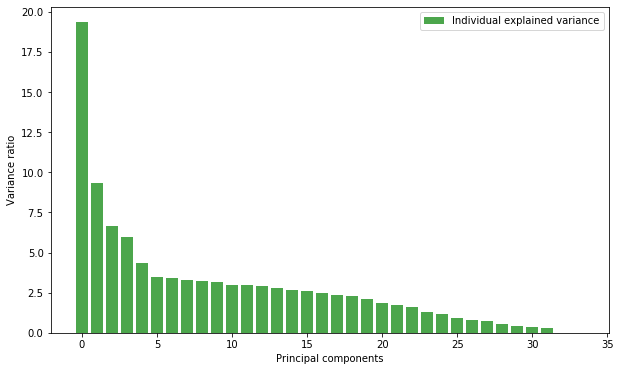

In [33]:
plt.figure(figsize=(10,6))
plt.bar(range(len(num_col.columns)), var_exp, alpha=0.7, align='center', label="Individual explained variance", color='green')
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

## PCA Start

In [34]:
from sklearn.decomposition import PCA

In [35]:
# Creating PCA component
pca = PCA(n_components=3)

In [36]:
pca.fit(num_col)
print(pca.explained_variance_ratio_)

[0.9851125  0.00488542 0.00339005]


In [37]:
pca.explained_variance_ratio_.sum()

0.993387973601919

In [38]:
# Preparing for add PCA vars and remove original Columns from data
numerical_col_names = list(num_col.columns)

In [39]:
# Dropping numerical columns from data
data.drop(numerical_col_names, axis=1, inplace = True)

# Fitting numeric Data into PCA model
optimised_columns = pca.fit_transform(num_col)

# Converting it into Dataframe for join dataframe
optimised_columns = pd.DataFrame(optimised_columns)
optimised_columns.columns = ["PCA1","PCA2","PCA3"]

# Combining optimised_columns and data (without original variabels)
final_df = data.join(optimised_columns)

In [40]:
final_df.shape

(1460, 45)

## Implement LR Model

In [41]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [42]:
df_house = pd.read_csv("home_pca.csv", index_col= 'Unnamed: 0' )

In [43]:
df_house.head(5)

,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice,PCA1,PCA2,PCA3
0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,RFn,TA,TA,Y,WD,Normal,208500,-2065.719381,3.775216,-286.696812
1,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,RFn,TA,TA,Y,WD,Normal,181500,-911.846281,-0.869590,744.229552
2,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,RFn,TA,TA,Y,WD,Normal,223500,734.053371,79.126107,-473.004891
3,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,Unf,TA,TA,Y,WD,Abnorml,140000,-970.644640,-42.754621,-581.071820
4,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,RFn,TA,TA,Y,WD,Normal,250000,3757.517789,612.370616,-538.636155


In [44]:
df_house.SalePrice.dtype

dtype('int64')

In [45]:
cat_var = df_house.select_dtypes(include = 'O')
cat_var.head(3)

,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,Gd,Typ,No,Attchd,RFn,TA,TA,Y,WD,Normal
1,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [46]:
cat_dummies = pd.get_dummies(data = cat_var, drop_first = True)
df_house.drop(cat_var, axis = 1, inplace= True)
df_house.join(cat_dummies)

,MasVnrArea,GarageYrBlt,SalePrice,PCA1,PCA2,PCA3,LotShape_IR2,LotShape_Reg,LandContour_Lvl,LotConfig_CulDSac,...,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Gd,GarageQual_TA,GarageCond_TA,PavedDrive_Y,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,196,2003,208500,-2065.719381,3.775216,-286.696812,0,1,1,0,...,1,0,0,1,1,1,0,1,1,0
1,0,1976,181500,-911.846281,-0.869590,744.229552,0,1,1,0,...,1,0,0,1,1,1,0,1,1,0
2,162,2001,223500,734.053371,79.126107,-473.004891,0,0,1,0,...,1,0,0,1,1,1,0,1,1,0
3,0,1998,140000,-970.644640,-42.754621,-581.071820,0,0,1,0,...,0,1,0,1,1,1,0,1,0,0
4,350,2000,250000,3757.517789,612.370616,-538.636155,0,0,1,0,...,1,0,0,1,1,1,0,1,1,0
5,0,1993,143000,3592.159369,-504.336765,-47.543395,0,0,1,0,...,0,1,0,1,1,1,0,1,1,0
6,186,2004,307000,-407.602898,779.207218,1034.984204,0,1,1,0,...,1,0,0,1,1,1,0,1,1,0
7,240,1973,200000,-120.366254,491.768929,-318.494136,0,0,1,0,...,1,0,0,1,1,1,0,1,1,0
8,0,1931,129900,-4398.529494,218.907890,-701.894101,0,1,1,0,...,0,1,0,0,1,1,0,1,0,0
9,0,1939,118000,-3102.040800,-403.254072,638.202729,0,1,1,0,...,1,0,1,0,1,1,0,1,1,0


In [47]:
y = df_house.loc[:,['SalePrice']]

In [48]:
# X = final_df.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,42,43,44]]
df_house.drop('SalePrice', axis = 1, inplace = True)
x = df_house

In [49]:
# splitting X and y into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=1)

In [50]:
# create linear regression object 
reg = LinearRegression()

In [51]:
# train the model using the training sets
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
# regression coefficients 
print('Coefficients: \n', reg.coef_) 
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test)))

Coefficients: 
 [[ 2.90998999e+01  1.10790704e+03  9.71119862e-01  7.97427084e+01
  -6.52371619e+00]]
Variance score: 0.4174423771359933
